##### This analysis is done in python primarily using the pandas library, and jupyter notebook as an interactive interpreter.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
pd.options.display.max_rows = 30

# This maps the underlying binary varaible into a human readable format.
df = pd.read_csv("/Users/Hegstrom/Desktop/HCT390_assignment_ACO_data_file.csv", thousands=',')
# Getting everything loaded up, and setting up the dataframe.


# Mapping into human readable form
hospital_physician_binary = {
    0: 'Physician Group',
    1: 'Hospital Partnership'
}
# Applying the data transformation to the hospital managed column.
df['Hospital_Managed'] = df['Hospital_Managed'].map(hospital_physician_binary)


# Question #2
#### Are physician-led or hospital-managed ACOs more likely to perform better with respect to ACO quality measures? Based on the four categories of ACO quality, on which categories do physician-led ACOs outperform hospital-managed ACOs?

In [17]:
# First, let's map the ACO columns to categories.
# All of these are from appendix A in the quality benchmark guideline PDF.

patient_caregiver_columns = ['ACO1','ACO2','ACO3','ACO4','ACO5',
                             'ACO6','ACO7','ACO34']

care_coordination_patient_safety_columns = ['ACO8', 'ACO35', 'ACO36',
                                            'ACO37', 'ACO38', 'ACO43',
                                           'ACO11', 'ACO12', 'ACO13', 'ACO44']

preventative_health_columns = ['ACO14', 'ACO15', 'ACO16', 'ACO17',
                              'ACO18', 'ACO19', 'ACO20', 'ACO42']

at_risk_depression_column = ['ACO40']

at_risk_dm_columns = ['ACO27', 'ACO41', 'DM_Comp']

at_risk_htn_column = ['ACO28']

at_risk_ischemic_vasc_column = ['ACO30']

In [18]:
# First, let's check the data type of the ACO columns for patient_caregiver
df[patient_caregiver_columns].dtypes

ACO1     float64
ACO2     float64
ACO3     float64
ACO4     float64
ACO5     float64
ACO6     float64
ACO7     float64
ACO34    float64
dtype: object

They're all floats, which is perfect. This means they are all numerical. If there was a "N/A", "-", a space (" ") or some other strange character, it could cause problems later. Our dataset does not have these problems. Now lets check some basic descriptive statistics:

In [19]:
np.round(df[patient_caregiver_columns].describe(), 2)

,ACO1,ACO2,ACO3,ACO4,ACO5,ACO6,ACO7,ACO34
count,548.00,548.00,548.00,548.00,548.00,548.00,548.00,548.00
mean,86.24,93.77,92.27,81.88,58.99,61.91,72.98,26.96
std,3.30,1.64,1.68,2.82,4.36,3.74,2.45,4.42
min,71.89,75.60,78.69,70.27,45.22,50.59,51.94,13.29
25%,84.62,92.97,91.45,80.13,55.87,59.61,71.75,23.97
50%,86.82,93.98,92.44,82.03,59.05,61.84,73.21,27.06
75%,88.46,94.71,93.29,83.72,62.12,64.10,74.56,29.92
max,94.21,97.27,96.22,89.03,73.48,73.53,79.62,40.58


There are 548 rows across all of the measurments. The mins are reasonable numbers, and the max is also a real number. This means there is not a 99999 or 000000 entered. Sometimes there are numerical codes used for "missing." Who knew data cleaning was the biggest part of data analysis?

The next question to understand, is to make sure that a positive number = better result. The appendix shows 7 columns where the opposite is true. None of which are in this category.

In [20]:
# Okay, let's splice the larger dataframe into a small subset we
# want to work with.
patient_caregiver_df = df[['Hospital_Managed'] + patient_caregiver_columns]
patient_caregiver_df

,Hospital_Managed,ACO1,ACO2,ACO3,ACO4,ACO5,ACO6,ACO7,ACO34
0,Physician Group,88.38,94.65,93.80,81.06,59.98,63.36,74.90,24.99
1,Physician Group,82.75,91.99,91.63,83.03,59.14,59.89,72.00,26.35
2,Hospital Partnership,86.73,93.88,94.31,80.33,65.65,62.33,73.72,26.82
3,Hospital Partnership,89.35,95.54,94.88,81.99,64.33,67.64,74.26,23.96
4,Hospital Partnership,87.15,94.51,94.27,85.77,59.74,63.42,72.64,26.02
5,Hospital Partnership,82.05,75.60,78.69,84.99,57.73,60.69,53.58,21.25
6,Physician Group,85.45,92.87,90.60,77.55,66.98,63.02,76.02,18.34
7,Physician Group,87.69,93.49,93.26,80.99,58.62,64.87,75.24,25.42
8,Hospital Partnership,86.06,93.21,91.96,81.37,58.62,57.60,74.81,23.05
9,Physician Group,88.20,93.87,92.65,85.34,58.95,63.31,71.27,24.81


In [21]:
# It's nice to start with a mean, standard deviation, and count to get a better undestanding.
patient_caregiver_df.groupby('Hospital_Managed').agg([np.mean, np.std, np.median]).T

Hospital_Managed  Hospital Partnership  Physician Group
ACO1  mean                   86.108872        86.439479
      std                     3.406356         3.106757
      median                 86.770000        86.960000
ACO2  mean                   93.739199        93.826066
      std                     1.746971         1.441169
      median                 93.970000        94.010000
ACO3  mean                   92.227181        92.349052
      std                     1.728104         1.590250
      median                 92.420000        92.480000
ACO4  mean                   81.982730        81.706825
      std                     2.873216         2.722220
      median                 82.060000        81.910000
ACO5  mean                   58.789614        59.306872
      std                     4.457619         4.197678
      median                 58.680000        59.210000
ACO6  mean                   61.722374        62.205166
      std                     3.720573         3.764046
      median                 61.670000        61.980000
ACO7  mean                   72.966677        73.001469
      std                     2.563921         2.261088
      median                 73.240000        73.140000
ACO34 mean                   27.055193        26.809052
      std                     4.413194         4.434220
      median                 27.270000        26.520000

There are some differences, but nothing stands out as being hugely different to me. Let's create some charts.

In [22]:
# In order to create the charts all on one chart, seaborn, the plotting library, requires it to be stacked.
# This is kinda hard to follow, because it's a bit hack-ey. So look at the output below.
patient_caregiver_df = patient_caregiver_df.set_index('Hospital_Managed').unstack()
patient_caregiver_df = patient_caregiver_df.reset_index()
patient_caregiver_df.columns = ['ACO', 'Hospital Managed', 'Score']
patient_caregiver_df

,ACO,Hospital Managed,Score
0,ACO1,Physician Group,88.38
1,ACO1,Physician Group,82.75
2,ACO1,Hospital Partnership,86.73
3,ACO1,Hospital Partnership,89.35
4,ACO1,Hospital Partnership,87.15
5,ACO1,Hospital Partnership,82.05
6,ACO1,Physician Group,85.45
7,ACO1,Physician Group,87.69
8,ACO1,Hospital Partnership,86.06
9,ACO1,Physician Group,88.20


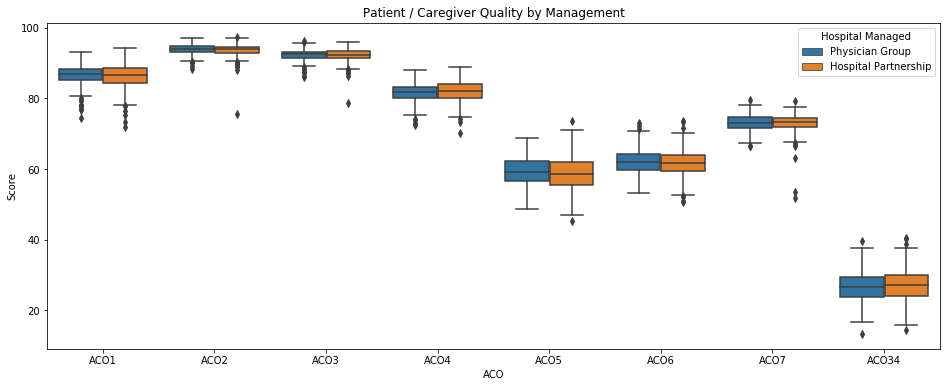

In [23]:
plt.figure(figsize=(16, 6))
plt.title('Patient / Caregiver Quality by Management')
ax = sns.boxplot(y="Score", x='ACO', hue="Hospital Managed",
                 data=patient_caregiver_df, orient='v')

I don't see any huge difference in the patient / caregiver values between physician groups and hospital groups.

Moving on to care coordination / patient safety metrics:

In [24]:
print(df[care_coordination_patient_safety_columns].dtypes)
print()
np.round(df[care_coordination_patient_safety_columns].describe(), 2)

ACO8     float64
ACO35    float64
ACO36    float64
ACO37    float64
ACO38    float64
ACO43    float64
ACO11    float64
ACO12    float64
ACO13    float64
ACO44    float64
dtype: object



,ACO8,ACO35,ACO36,ACO37,ACO38,ACO43,ACO11,ACO12,ACO13,ACO44
count,548.00,548.00,548.00,548.00,548.00,548.00,548.00,536.00,546.00,548.00
mean,14.98,18.59,37.05,76.77,59.05,1.98,98.18,85.97,79.65,64.36
std,0.49,1.06,4.93,9.60,7.03,0.38,4.04,16.60,15.15,13.60
min,13.47,15.12,21.31,49.31,34.88,1.00,59.24,1.23,5.01,0.00
25%,14.66,17.89,33.79,70.71,54.58,1.71,98.25,79.66,71.76,57.89
50%,14.96,18.53,36.76,76.45,58.94,1.94,99.78,92.88,83.10,65.07
75%,15.30,19.31,39.81,82.71,63.49,2.22,100.00,97.84,90.90,71.89
max,16.67,21.49,59.75,119.18,86.80,3.33,100.00,100.00,100.00,100.00


In [25]:
#Splicing the data, and creating some descriptive statistics, again.
care_coordination_patient_safety_df = df[['Hospital_Managed'] + care_coordination_patient_safety_columns]
care_coordination_patient_safety_df.groupby('Hospital_Managed').agg([np.mean, np.std, np.median]).T

Hospital_Managed  Hospital Partnership  Physician Group
ACO8  mean                   14.972315        14.981991
      std                     0.505429         0.468784
      median                 14.950000        14.980000
ACO35 mean                   18.619466        18.541754
      std                     1.059657         1.061496
      median                 18.590000        18.490000
ACO36 mean                   37.043620        37.055308
      std                     4.879906         5.013065
      median                 36.610000        37.070000
ACO37 mean                   76.915252        76.546398
      std                     9.682524         9.475109
      median                 76.450000        76.450000
ACO38 mean                   59.086736        58.986256
      std                     7.055150         7.013317
      median                 58.780000        59.090000
ACO43 mean                    1.982611         1.977441
      std                     0.383140         0.374330
      median                  1.930000         1.970000
ACO11 mean                   98.253680        98.062322
      std                     3.741166         4.483979
      median                 99.830000        99.690000
ACO12 mean                   85.366084        86.960980
      std                    17.334767        15.320190
      median                 92.490000        93.010000
ACO13 mean                   78.863631        80.905714
      std                    15.890227        13.815339
      median                 82.720000        84.120000
ACO44 mean                   64.462463        64.204787
      std                    12.872016        14.715934
      median                 65.220000        65.060000

Again, for the care coordination and patient safety benchmarks, there doesn't seem to be any obvious differences.
Let's create some charts, again.

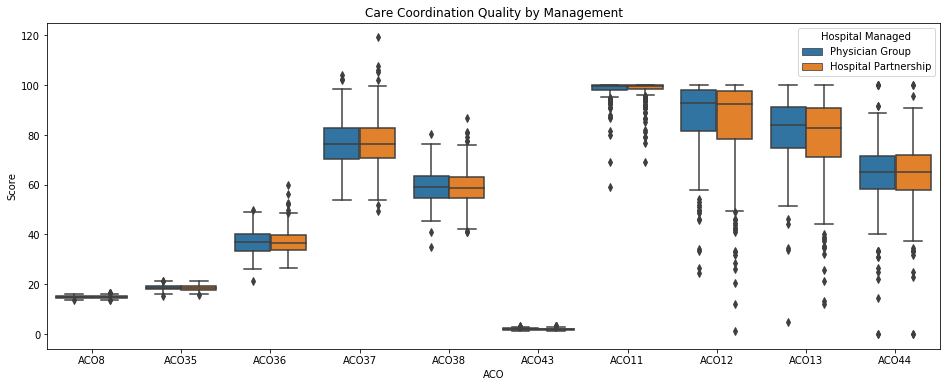

In [26]:
care_coordination_patient_safety_df = care_coordination_patient_safety_df.set_index('Hospital_Managed').unstack()
care_coordination_patient_safety_df = care_coordination_patient_safety_df.reset_index()
care_coordination_patient_safety_df.columns = ['ACO', 'Hospital Managed', 'Score']
plt.figure(figsize=(16, 6))
plt.title('Care Coordination Quality by Management')
ax = sns.boxplot(y="Score", x='ACO', hue="Hospital Managed",
                 data=care_coordination_patient_safety_df, orient='v')

This shows that for nearly all the benchmarks, the median appears to be the same. The ranges seem to var quite a bit, which is interesting.

Moving on to preventative health metrics:

In [27]:
print(df[preventative_health_columns].dtypes)
print()
np.round(df[preventative_health_columns].describe(), 2)

ACO14    float64
ACO15    float64
ACO16    float64
ACO17    float64
ACO18    float64
ACO19    float64
ACO20    float64
ACO42    float64
dtype: object



,ACO14,ACO15,ACO16,ACO17,ACO18,ACO19,ACO20,ACO42
count,546.00,546.00,546.00,546.00,546.00,545.00,545.00,546.00
mean,72.68,75.90,76.73,72.84,66.60,68.21,71.94,81.46
std,12.13,12.98,14.28,18.89,17.97,11.93,10.34,6.93
min,25.67,24.66,21.84,11.11,0.00,22.22,19.76,23.45
25%,66.74,70.09,68.43,60.35,55.59,61.45,66.12,78.52
50%,73.24,78.68,78.80,76.47,68.84,70.11,72.77,82.26
75%,80.81,85.65,87.28,87.95,80.84,76.21,79.92,85.36
max,99.04,98.15,100.00,100.00,100.00,99.83,93.19,99.78


For the preventative health metrics, ACO19 and ACO20 are missing for one of the organizations.

In [28]:
#Splicing the data, and creating some descriptive statistics, again.
preventative_health_df = df[['Hospital_Managed'] + preventative_health_columns]
preventative_health_df.groupby('Hospital_Managed').agg([np.mean, np.std, np.median]).T

Hospital_Managed  Hospital Partnership  Physician Group
ACO14 mean                   72.281994        73.315381
      std                    11.935123        12.430050
      median                 72.105000        74.200000
ACO15 mean                   76.011637        75.729238
      std                    13.187240        12.683212
      median                 79.145000        78.285000
ACO16 mean                   76.117440        77.720857
      std                    14.810238        13.357512
      median                 77.990000        80.165000
ACO17 mean                   71.716696        74.627000
      std                    19.264152        18.166501
      median                 75.860000        77.675000
ACO18 mean                   65.829940        67.844286
      std                    18.156133        17.641412
      median                 67.830000        70.570000
ACO19 mean                   67.872478        68.753619
      std                    11.656245        12.367221
      median                 69.480000        70.280000
ACO20 mean                   71.970090        71.884810
      std                    10.405914        10.248592
      median                 73.140000        72.595000
ACO42 mean                   81.403750        81.562952
      std                     7.293616         6.319719
      median                 82.320000        82.050000

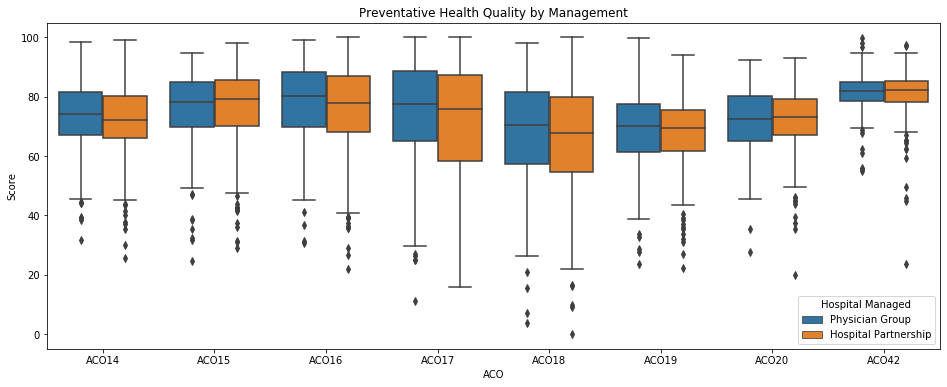

In [29]:
preventative_health_df = preventative_health_df.set_index('Hospital_Managed').unstack()
preventative_health_df = preventative_health_df.reset_index()
preventative_health_df.columns = ['ACO', 'Hospital Managed', 'Score']
plt.figure(figsize=(16, 6))
plt.title('Preventative Health Quality by Management')
ax = sns.boxplot(y="Score", x='ACO', hue="Hospital Managed",
                 data=preventative_health_df, orient='v')

Again, the average scores appear to be mostly the same. There's some more variation around ACO17.

Now moving on to the "At risk" categories. They're getting combined to speed up this analysis.

In [31]:
#For the at-risk metrics, I'm going to group them into one dataframe.
at_risk_columns = at_risk_depression_column + at_risk_dm_columns + at_risk_htn_column + at_risk_ischemic_vasc_column

print(df[at_risk_columns].dtypes)
print()
np.round(df[at_risk_columns].describe(), 2)

ACO40      float64
ACO27      float64
ACO41      float64
DM_Comp    float64
ACO28      float64
ACO30      float64
dtype: object



,ACO40,ACO27,ACO41,DM_Comp,ACO28,ACO30
count,540.00,546.00,546.00,546.00,544.00,546.00
mean,8.82,15.52,52.38,46.76,73.12,88.90
std,10.89,6.92,15.22,14.52,7.46,7.60
min,0.00,5.36,0.00,0.00,2.82,33.99
25%,2.69,11.40,42.76,37.02,68.50,86.84
50%,6.34,14.37,52.80,47.03,73.07,90.73
75%,11.73,17.84,63.42,57.50,77.83,93.49
max,100.00,100.00,87.50,83.47,92.77,100.00


In [32]:
at_risk_df = df[['Hospital_Managed'] + at_risk_columns]
at_risk_df.groupby('Hospital_Managed').agg([np.mean, np.std, np.median]).T

Hospital_Managed  Hospital Partnership  Physician Group
ACO40   mean                  8.553994         9.255797
        std                  10.966985        10.766860
        median                6.120000         7.140000
ACO27   mean                 15.878095        14.938810
        std                   7.630098         5.580802
        median               14.390000        14.275000
ACO41   mean                 52.361280        52.415333
        std                  15.253749        15.212134
        median               51.640000        53.320000
DM_Comp mean                 46.628095        46.967952
        std                  14.521095        14.543890
        median               46.555000        47.655000
ACO28   mean                 72.864880        73.519667
        std                   7.967373         6.578970
        median               72.725000        73.840000
ACO30   mean                 88.771607        89.101095
        std                   7.842664         7.213944
        median               90.520000        91.070000

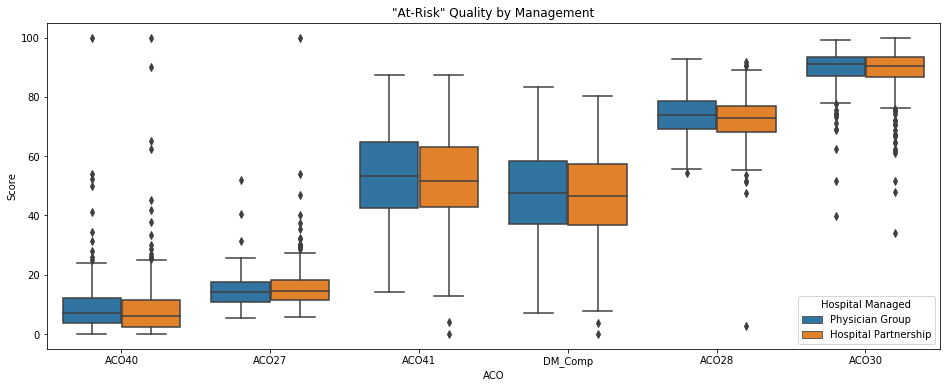

In [33]:
at_risk_df = at_risk_df.set_index('Hospital_Managed').unstack()
at_risk_df = at_risk_df.reset_index()
at_risk_df.columns = ['ACO', 'Hospital Managed', 'Score']
plt.figure(figsize=(16, 6))
plt.title('"At-Risk" Quality by Management')
ax = sns.boxplot(y="Score", x='ACO', hue="Hospital Managed",
                 data=at_risk_df, orient='v')

Some of these metrics appear a bit more intersting. ACO28, the control of HTN metric, has a significant outlier in the hospital partnership category. Likewise, I'd want to look at the range for ACO27 in more detail. The outliers are interesting.

But, to answer question #2, there does not appear to be a difference between physician lead or hospital partnership groups in terms of medicare quality metrics. To be sure, one could do more statistical tests, but they will not come out as significant (I tried).